In [1]:
!pip install duckdb

In [2]:
import duckdb
import pandas as pd

In [3]:
df_estados = pd.read_csv('raw_data/estado_regiao.csv', encoding='iso-8859-1', delimiter=';')

In [4]:
df_estados.head()

,id_estado,sigla,estado,regiao,pais
0,1,AC,Acre,Norte,Brasil
1,2,AL,Alagoas,Nordeste,Brasil
2,3,AP,Amapá,Norte,Brasil
3,4,AM,Amazonas,Norte,Brasil
4,5,BA,Bahia,Nordeste,Brasil


In [5]:
df_respondentes = pd.read_csv('raw_data/respondentes_pesquisa.csv', encoding='iso-8859-1', delimiter='|', decimal='.')

In [6]:
df_respondentes.head()

,cod_pessoa,genero,data_nascimento,educacao,renda_mensal,peso,colesterol,estado_civil,id_estado
0,10141743,Masculino,1981-04-25,Pós-Graduação,1000-3000,61.018446,96.777322,Viúvo,19
1,10141860,Feminino,1966-01-19,Ensino Médio,> 5000,108.557401,176.108130,Viúvo,1
2,10142548,Masculino,1973-08-02,Pós-Graduação,> 5000,112.349921,144.110224,Casado,19
3,10142591,Masculino,1997-03-05,Ensino Fundamental,< 1000,116.238829,235.386072,Divorciado,17
4,10142654,Feminino,1969-08-05,Graduação,3000-5000,88.609912,38.102665,Casado,15


In [7]:
import os

PATH = 'raw_data/dados_pesquisa_preferencias/'
lista_df = [] # cria uma lista vazia
for arquivo in os.listdir(PATH):
    local_arquivo = os.path.join(PATH, arquivo)
    if arquivo.endswith('.csv'):
        df = pd.read_csv(local_arquivo, sep = ';', encoding='latin-1')       
        lista_df.append(df)

df_preferencias = pd.concat(lista_df)

In [8]:
df_preferencias.head()

,cod_pessoa,data_coleta,animal_estimacao,clima,bebida_favorita,hobby,atividade_fisica,preferencia_musical
0,10141824,2024-03-18,Gato,quente,Cerveja,Praticar esporte,Mensal,Sertanejo
1,10141910,2024-03-18,Gato,quente,Vinho,Assistir TV,Diária,Clássica
2,10141955,2024-03-18,Coelho,quente,Vinho,Dormir,Mensal,Rock
3,10142143,2024-03-18,Coelho,quente,Cerveja,Pintar quadros,Nunca,Sertanejo
4,10142661,2024-03-18,Peixe,quente,Café,Pintar quadros,Diária,Clássica


In [9]:
df_unido = pd.merge(df_respondentes, df_estados, left_on='id_estado', right_on='id_estado', how='left')
df_unido = pd.merge(df_unido, df_preferencias, left_on='cod_pessoa', right_on='cod_pessoa', how='left')
df_unido.drop('id_estado', axis=1, inplace=True)

In [10]:
df_unido.head()

,cod_pessoa,genero,data_nascimento,educacao,renda_mensal,peso,colesterol,estado_civil,sigla,estado,regiao,pais,data_coleta,animal_estimacao,clima,bebida_favorita,hobby,atividade_fisica,preferencia_musical
0,10141743,Masculino,1981-04-25,Pós-Graduação,1000-3000,61.018446,96.777322,Viúvo,RJ,Rio de Janeiro,Sudeste,Brasil,2024-01-05,Lagarto,frio,Cerveja,Praticar esporte,Diária,Pop
1,10141860,Feminino,1966-01-19,Ensino Médio,> 5000,108.557401,176.108130,Viúvo,AC,Acre,Norte,Brasil,2024-01-05,Coelho,quente,Café,Assistir TV,Semanal,Pop
2,10142548,Masculino,1973-08-02,Pós-Graduação,> 5000,112.349921,144.110224,Casado,RJ,Rio de Janeiro,Sudeste,Brasil,2024-01-05,Lagarto,frio,Café,Ler livros,Nunca,Rock
3,10142591,Masculino,1997-03-05,Ensino Fundamental,< 1000,116.238829,235.386072,Divorciado,PE,Pernambuco,Nordeste,Brasil,2024-01-05,Pássaro,moderado,Cerveja,Aprender algo novo,Mensal,Rock
4,10142654,Feminino,1969-08-05,Graduação,3000-5000,88.609912,38.102665,Casado,PB,Paraíba,Nordeste,Brasil,2024-01-05,Lagarto,moderado,Café,Assistir TV,Nunca,Pop


In [11]:
df_unido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2195 entries, 0 to 2194
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cod_pessoa           2195 non-null   int64  
 1   genero               2195 non-null   object 
 2   data_nascimento      2195 non-null   object 
 3   educacao             2195 non-null   object 
 4   renda_mensal         2195 non-null   object 
 5   peso                 2190 non-null   float64
 6   colesterol           2195 non-null   float64
 7   estado_civil         2185 non-null   object 
 8   sigla                2195 non-null   object 
 9   estado               2195 non-null   object 
 10  regiao               2195 non-null   object 
 11  pais                 2195 non-null   object 
 12  data_coleta          2195 non-null   object 
 13  animal_estimacao     2195 non-null   object 
 14  clima                2195 non-null   object 
 15  bebida_favorita      2195 non-null   o

In [12]:
moda_estado_civil = df_unido['estado_civil'].mode()[0]
media_peso = df_unido['peso'].mean().round()

df_unido['estado_civil'].fillna(value=moda_estado_civil, inplace=True)
df_unido['peso'].fillna(value=media_peso, inplace=True)

In [13]:
len(df_unido['cod_pessoa'].unique())

2127

In [14]:
df_unido.drop_duplicates(inplace=True)

In [15]:
df_unido.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2127 entries, 0 to 2126
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cod_pessoa           2127 non-null   int64  
 1   genero               2127 non-null   object 
 2   data_nascimento      2127 non-null   object 
 3   educacao             2127 non-null   object 
 4   renda_mensal         2127 non-null   object 
 5   peso                 2127 non-null   float64
 6   colesterol           2127 non-null   float64
 7   estado_civil         2127 non-null   object 
 8   sigla                2127 non-null   object 
 9   estado               2127 non-null   object 
 10  regiao               2127 non-null   object 
 11  pais                 2127 non-null   object 
 12  data_coleta          2127 non-null   object 
 13  animal_estimacao     2127 non-null   object 
 14  clima                2127 non-null   object 
 15  bebida_favorita      2127 non-null   object

In [16]:
df_unido["data_nascimento"] = df_unido["data_nascimento"].astype('datetime64[ns]')
df_unido["data_coleta"] = df_unido["data_coleta"].astype('datetime64[ns]')

df_unido['idade'] = (pd.to_datetime('2024-06-20') - df_unido["data_nascimento"]).dt.days / 365
df_unido['idade'] = df_unido['idade'].astype('int64')

In [17]:
duckdb.sql("""
SELECT animal_estimacao, COUNT(animal_estimacao) as qtd
FROM df_unido
WHERE genero = 'Feminino'
GROUP BY genero, animal_estimacao
ORDER BY qtd ASC
""")

┌──────────────────┬───────┐
│ animal_estimacao │  qtd  │
│     varchar      │ int64 │
├──────────────────┼───────┤
│ Pássaro          │    84 │
│ Coelho           │    85 │
│ Lagarto          │    86 │
│ Tartaruga        │    87 │
│ Cachorro         │    90 │
│ Hamster          │    95 │
│ Peixe            │    95 │
│ Gato             │   107 │
└──────────────────┴───────┘

In [18]:
df_unido['atividade_fisica'].unique()

array(['Diária', 'Semanal', 'Nunca', 'Mensal'], dtype=object)

In [19]:
duckdb.sql("""
SELECT AVG(colesterol)
FROM df_unido
WHERE atividade_fisica = 'Diária'
""")

┌────────────────────┐
│  avg(colesterol)   │
│       double       │
├────────────────────┤
│ 118.90591506495466 │
└────────────────────┘

In [20]:
duckdb.sql("""
SELECT preferencia_musical, COUNT(preferencia_musical) as qtd
FROM df_unido
WHERE estado_civil = 'Casado'
GROUP BY preferencia_musical
ORDER BY qtd DESC
""")

┌─────────────────────┬───────┐
│ preferencia_musical │  qtd  │
│       varchar       │ int64 │
├─────────────────────┼───────┤
│ Rock                │   153 │
│ Clássica            │   142 │
│ Pop                 │   137 │
│ Sertanejo           │   136 │
└─────────────────────┴───────┘

In [21]:
duckdb.sql("""
SELECT AVG(idade)
FROM df_unido
WHERE genero = 'Masculino' AND clima = 'frio' AND bebida_favorita = 'Chá'
""")

┌────────────────────┐
│     avg(idade)     │
│       double       │
├────────────────────┤
│ 46.282051282051285 │
└────────────────────┘

In [22]:
duckdb.sql("""
SELECT count(0)
FROM df_unido
WHERE renda_mensal = '> 5000' AND educacao = 'Graduação'
""")

┌──────────┐
│ count(0) │
│  int64   │
├──────────┤
│      132 │
└──────────┘

In [25]:
duckdb.sql("""
SELECT AVG(colesterol)
FROM df_unido
WHERE estado_civil = 'Casado' AND regiao = 'Sudeste'
""")

┌───────────────────┐
│  avg(colesterol)  │
│      double       │
├───────────────────┤
│ 114.6427754663066 │
└───────────────────┘

In [43]:
duckdb.sql("""
SELECT hobby, COUNT(hobby) as qtd
FROM df_unido
WHERE genero = 'Feminino' AND idade > 35
GROUP BY hobby
ORDER BY qtd DESC
""")

┌────────────────────┬───────┐
│       hobby        │  qtd  │
│      varchar       │ int64 │
├────────────────────┼───────┤
│ Escutar música     │    80 │
│ Escrever           │    76 │
│ Dormir             │    73 │
│ Praticar esporte   │    69 │
│ Assistir TV        │    67 │
│ Aprender algo novo │    65 │
│ Pintar quadros     │    63 │
│ Ler livros         │    61 │
└────────────────────┴───────┘

<Axes: >

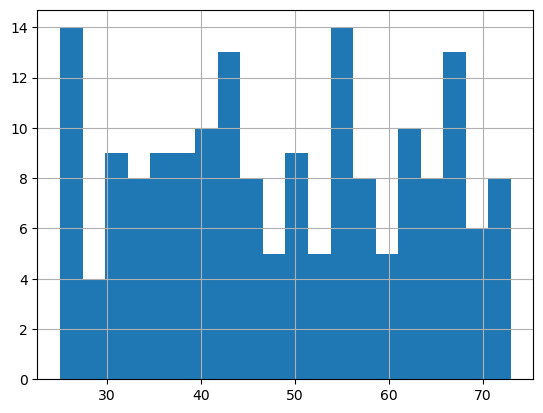

In [54]:
df_unido[(df_unido['genero']=='Masculino') & (df_unido['hobby']=='Praticar esporte')]['idade'].hist(bins=20)

In [63]:
df_unido[(df_unido['animal_estimacao']=='Cachorro') & (df_unido['hobby']=='Ler livros')]['genero'].value_counts(normalize=True) * 100

genero
Masculino    70.27027
Feminino     29.72973
Name: proportion, dtype: float64

In [64]:
df_unido[(df_unido['hobby']=='Assistir TV')]['idade'].std()

14.345856108856259